In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("/content/drive/MyDrive/Hamoye code/household_power_consumption.txt",sep=";")
data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [3]:
data.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2075254,26/11/2010,20:58:00,0.946,0,240.43,4,0,0,0.0
2075255,26/11/2010,20:59:00,0.944,0,240,4,0,0,0.0
2075256,26/11/2010,21:00:00,0.938,0,239.82,3.8,0,0,0.0
2075257,26/11/2010,21:01:00,0.934,0,239.7,3.8,0,0,0.0
2075258,26/11/2010,21:02:00,0.932,0,239.55,3.8,0,0,0.0


In [4]:
data = pd.read_csv("/content/drive/MyDrive/Hamoye code/household_power_consumption.txt",sep=";",low_memory=False, na_values=['nan','?'])
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [5]:
data.dtypes

Date                      object
Time                      object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [6]:
#merging date and time columns
data['DT'] = data['Date'] + ' ' + data['Time']
data.drop(columns= ['Date','Time'],inplace = True)
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DT
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,16/12/2006 17:24:00
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,16/12/2006 17:25:00
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,16/12/2006 17:26:00
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,16/12/2006 17:27:00
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,16/12/2006 17:28:00


In [7]:
# changing date to datetime and setting as index
data['DT'] = pd.to_datetime(data['DT'])
data.set_index("DT", inplace=True)
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DT,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [8]:
data.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [9]:
data.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [10]:
#filling missing values with forward fill
data.fillna(method='ffill',inplace = True)


In [11]:
data.isna().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [12]:
data.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,1.086168e+00,1.233280e-01,2.408416e+02,4.604226e+00,1.110995e+00,1.287958e+00,6.416570e+00
std,1.053172e+00,1.125144e-01,3.235574e+00,4.426775e+00,6.115908e+00,5.786865e+00,8.419505e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.390000e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.980000e-01,1.000000e-01,2.410200e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.524000e+00,1.940000e-01,2.428700e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


<Figure size 720x432 with 0 Axes>

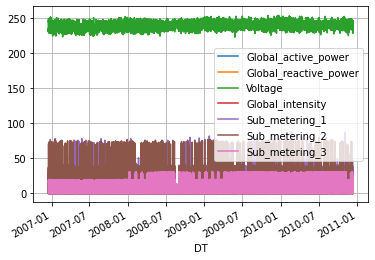

In [13]:
# ploting the entire dataframe
plt.figure(figsize=(10,6))
data.plot(grid=True)

In [14]:
#Downsamplying to daily data points
data_daily = data.resample('D').mean()
data_daily.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DT,,,,,,,
2006-12-16,3.053475,0.088187,236.243763,13.082828,0.000000,1.378788,12.439394
2006-12-17,2.354486,0.156949,240.087028,9.999028,1.411806,2.907639,9.264583
2006-12-18,1.530435,0.112356,241.231694,6.421667,0.738194,1.820139,9.734722
2006-12-19,1.157079,0.104821,241.999313,4.926389,0.582639,5.279167,4.303472
2006-12-20,1.545658,0.111804,242.308063,6.467361,0.000000,1.838889,9.765972


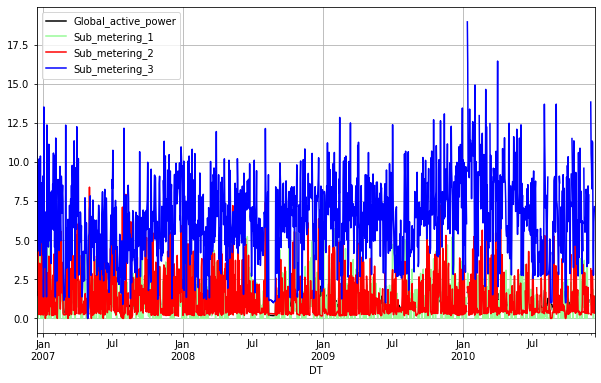

In [15]:
#plotting daily data points of electric consumption

plt.figure(figsize=(10,6))
data.Global_active_power.resample('D').mean().plot(color='black', legend=True, grid=True)
data.Sub_metering_1.resample('D').mean().plot(color='PaleGreen',legend=True, grid= True)
data.Sub_metering_2.resample('D').mean().plot(color='red',legend=True, grid= True)
data.Sub_metering_3.resample('D').mean().plot(color='blue',legend=True, grid= True)
plt.show()

In [20]:
data_weekly = data.resample('W').mean()
data_weekly.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DT,,,,,,,
2006-12-17,2.505248,0.142118,239.258088,10.664161,1.107298,2.577887,9.949346
2006-12-24,1.733890,0.116684,241.369917,7.340714,1.110119,2.118155,7.683234
2006-12-31,1.959222,0.144163,241.909324,8.241607,1.419940,2.248611,6.673909
2007-01-07,1.152101,0.109731,238.847989,4.885258,1.068750,0.860020,6.092659
2007-01-14,1.420230,0.146215,238.990405,6.058849,2.433135,1.490774,6.912202


In [23]:
data_monthly =data.resample('M').mean()
data_monthly.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DT,,,,,,,
2006-12-31,1.901537,0.131400,241.440835,8.030969,1.251864,2.216312,7.409847
2007-01-31,1.429339,0.124627,240.147730,6.061685,1.623096,1.487052,7.238687
2007-02-28,1.154988,0.114889,239.871108,4.895942,0.886235,1.624702,5.776711
2007-03-31,1.238305,0.114860,239.948540,5.252634,1.306160,1.969512,6.278360
2007-04-30,0.936878,0.128771,238.445854,4.038176,1.063843,1.245625,4.490833


<function matplotlib.pyplot.show>

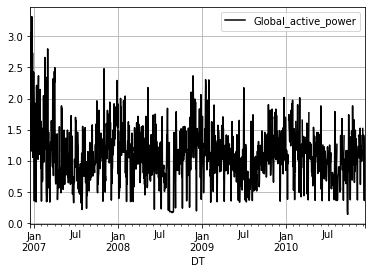

In [16]:
#Q11
data.Global_active_power.resample('D').mean().plot(color='black', legend=True, grid=True)
plt.show

In [17]:
#Q12
data["Global_active_power"].corr(data["Global_reactive_power"],method ='pearson').round(2)

0.25

In [18]:
#Q13
data["Voltage"].corr(data["Global_intensity"],method ='pearson').round(2)

-0.41

Decomposition

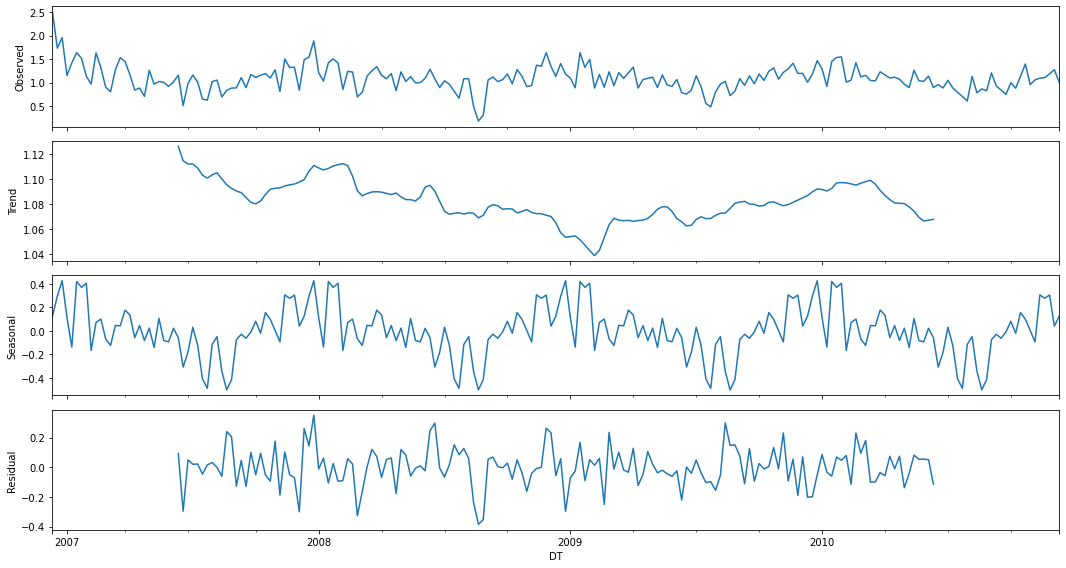

In [21]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
decompose_series = sm.tsa.seasonal_decompose(data_weekly['Global_active_power'], model='additive')
decompose_series.plot()
plt.show()

In [24]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(data_monthly['Global_active_power'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')
for k, v in adf_result[4].items():
    print(f'   {k}: {v}') 

ADF Statistic: -2.392526356144154
p-value: 0.14385690984248312
No. of lags used: 11
No. of observations used : 37
Critical Values:
   1%: -3.6209175221605827
   5%: -2.9435394610388332
   10%: -2.6104002410518627


We can see that our data is not stationary from the fact that our p-value is greater than 5 percent and the test statistic is greater than the critical values

<function matplotlib.pyplot.show>

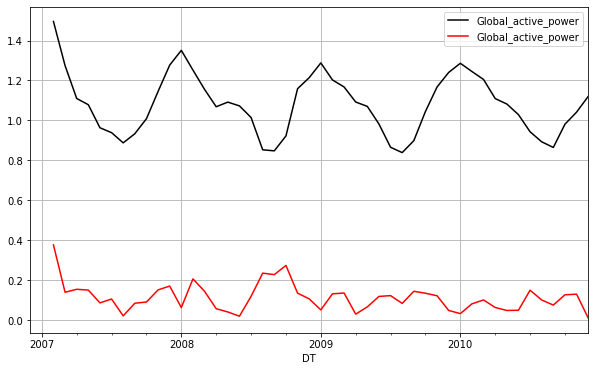

In [25]:
#transforming the data by smoothing
rol_mean = data_monthly['Global_active_power'].rolling(3).mean()
rol_std = data_monthly['Global_active_power'].rolling(3).std()
#plotting the rolling mean and stardard deviagtion
plt.figure(figsize=(10,6))
rol_mean.plot(color='black', legend=True, grid=True)
rol_std.plot(color='red', legend=True, grid=True)
plt.show

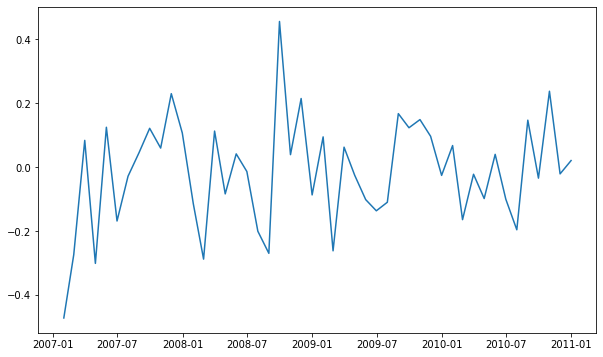

In [26]:
#converting to a stationary time series by differencing
data_diff = data_monthly.diff(periods= 1)
plt.figure(figsize=(10,6))
plt.plot(data_diff['Global_active_power'])
plt.show()

from the plot above the data is now stationary there is no trend.

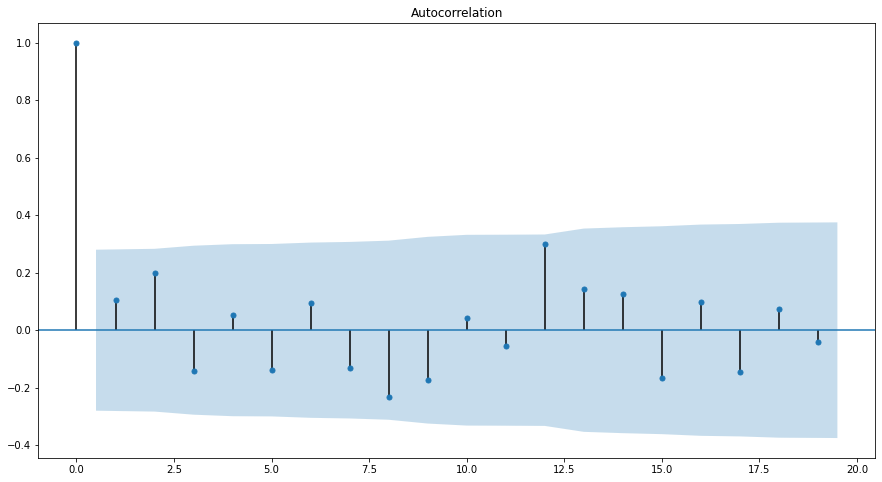

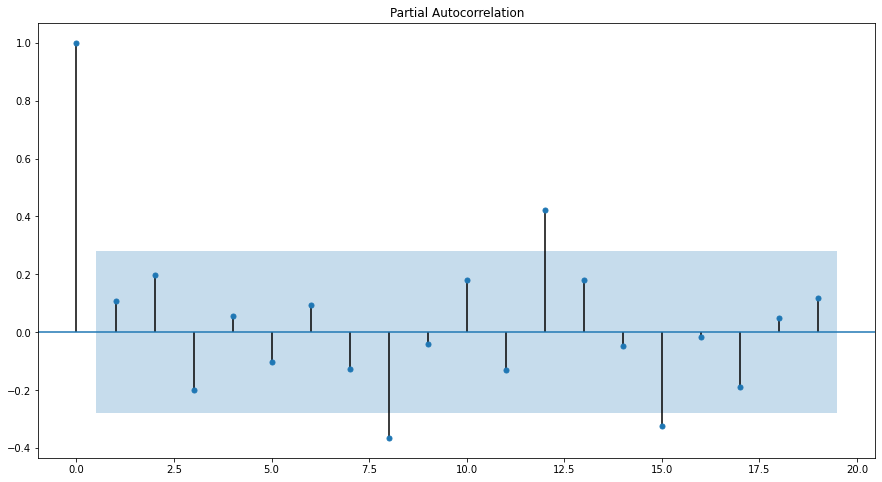

In [27]:
# calculating ACF and PACF
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#ACF
data_diff = data_diff.fillna(method= 'bfill')
plot_acf(data_diff['Global_active_power'], lags=range(0,20))
#PACT
plot_pacf(data_diff['Global_active_power'], lags=range(0,20))
plt.show()

In [28]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_error

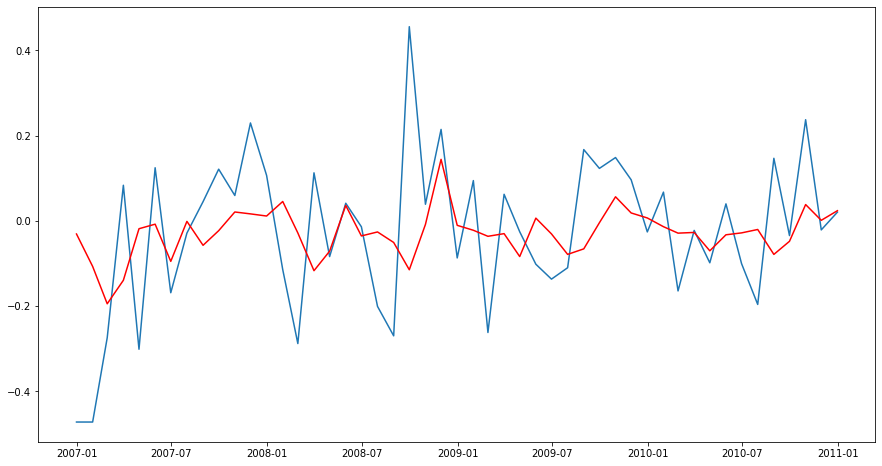

In [29]:
#from the ACF and PACF plot p= 0, q= 3
# fitting Moving Average model(MA)
MA_model = ARIMA(data_diff['Global_active_power'], order=(0,0,3))
MA_model_results = MA_model.fit()
plt.plot(data_diff['Global_active_power'])
plt.plot(MA_model_results.fittedvalues, color='red')

In [30]:
import itertools
p=q=d= range(0,5)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [31]:
X= data_diff['Global_active_power'].values
X.size

49

In [32]:

train = X[:39] #39 values as train data
test = X[39:] #10 values as test data

In [33]:
#checking for the best param with the lowest aic values to fit the ARIMA model
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
  try:
      model = ARIMA(train, order=param)
      Result = model.fit()
      print(param,Result.aic)
  except:
    continue
 

(0, 0, 0) -14.160721862182662
(0, 0, 1) -12.742634555512922
(0, 0, 2) -13.233791054535118
(0, 0, 3) -11.248414177476349
(0, 0, 4) -9.328822496558104
(0, 1, 0) 4.53688945406423
(0, 1, 1) -10.493301893541854
(0, 1, 2) -8.780380232123463
(0, 2, 0) 47.464465627114905
(0, 2, 1) 10.694075480480635
(1, 0, 0) -13.021519646079497
(1, 1, 0) -8.288977466451044
(1, 1, 1) -8.917184330490556
(1, 1, 2) -10.139372185441928
(1, 1, 3) -9.868834376320777
(1, 2, 0) 17.3923367102244
(1, 2, 1) -1.7049747846256622
(1, 2, 3) -2.779768303781708
(1, 2, 4) -1.1240553382649239
(2, 0, 0) -12.913214648376595
(2, 0, 1) -9.752027643201956
(2, 1, 0) -6.610725355502652
(2, 1, 1) -8.803534395993196
(2, 2, 0) 13.036835667817769
(2, 2, 1) -0.031184770064157874
(2, 2, 3) 14.925008316695681
(2, 2, 4) 3.5544419631869317
(3, 0, 0) -11.8747726298663
(3, 0, 1) -8.8990784088858
(3, 0, 2) 0.5327637100586031
(3, 0, 3) -5.794701579212614
(3, 1, 0) -6.648359646587153
(3, 1, 1) -7.6334294416603115
(3, 1, 2) -4.801611548245916
(3, 1, 

In [34]:
#fitting ARIMA model and making predictions
model = ARIMA(train,order= (1,2,4))
Result = model.fit()
print(Result.aic)

-1.1240553382649239


In [35]:
predictions = Result.forecast(steps=10)[0]
predictions

array([-0.00537708, -0.12041741, -0.01168404, -0.14226311, -0.03550953,
       -0.16806803, -0.06329424, -0.19783219, -0.09503818, -0.23155557])

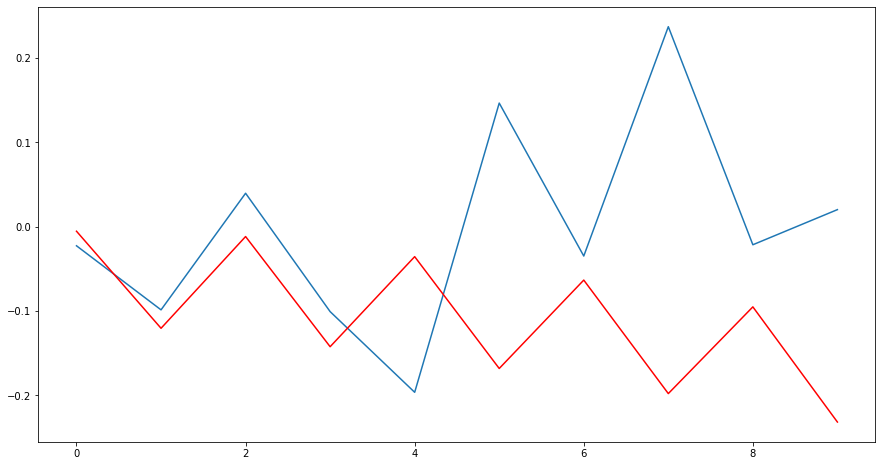

In [36]:
plt.plot(test)
plt.plot(predictions, color='red')

In [37]:
# calculating the mean absolute error
MAE = mean_absolute_error(test, predictions)
print("The mean absolute error is ",MAE)

The mean absolute error is  0.13962520164043318


In [38]:
#calculating the root mean square error
rms = sqrt(mean_squared_error(test, predictions))
print("The root mean squared error is ",rms)

The root mean squared error is  0.1971681635997694


Predictions with fbprophet Q14-19

In [39]:
from fbprophet import Prophet

In [40]:
#Q14
Data_daily = data.resample('D').sum()
Data_daily.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DT,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [41]:
Data_daily =Data_daily.rename(columns={"DT": "ds", "Global_active_power": "y"})
Data_daily.head()

,y,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DT,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [42]:
x= Data_daily.values
Train =x[:365]
Test =x[365:]

In [43]:
model = Prophet()
model.fit(data_daily)
future = model.make_future_dataframe(periods=10, freq='M') 
forecast = model.predict(future) 
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

ValueError: ignored